# header file

In [62]:
import numpy as np
import pandas as pd
import math

print('done')

done


In [63]:
np.set_printoptions(suppress=True) #prevent numpy exponential 

In [64]:
path = "/media/mint/New Volume/4_semester_IIIT_D/capstone/hmog_dataset/100669/100669_session_"#13/TouchEvent.csv'

In [65]:
# screen grid (splitting the user screen into y_cross * x_cross)
y_cross = 8#6#10#8
x_cross = 6#4#8#6

# getting the screen size

In [66]:
# to get the minimum and maximum dimension of user screen size 

def screen_size():
    xx_min = 100000
    xx_max = -1
    yy_min = 100000
    yy_max = -1
    for i in range(1,25):
        data = pd.read_csv(path+str(i)+"/TouchEvent.csv", header=None)
        # data.head()
        x_min = np.min(data.iloc[:,6])# 6 and 7 th are the x and y axis of csv file
        x_max = np.max(data.iloc[:,6])
        y_min = np.min(data.iloc[:,7])
        y_max = np.max(data.iloc[:,7])
        if(x_min < xx_min):
            xx_min = x_min
        if(y_min < yy_min):
            yy_min = y_min
        if(x_max > xx_max):
            xx_max = x_max
        if(y_max > yy_max):
            yy_max = y_max
    # print(xx_min)
    # print(xx_max)
    # print(yy_min)
    # print(yy_max)

    x_len = xx_max - xx_min
    # print(x_len)
    fact = x_len / x_cross 
    # print(fact)
    x_axis = np.linspace(fact, x_len-fact, x_cross-1)
    print(x_axis)

    y_len = yy_max - yy_min
    # print(y_len)
    fact = y_len / y_cross 
    # print(fact)
    y_axis = np.linspace(fact, y_len-fact, y_cross-1)
    print(y_axis)
    return x_axis, y_axis

In [67]:
x_axis, y_axis = screen_size()

[ 174.75  349.5   524.25  699.    873.75]
[  259.38265625   518.7653125    778.14796875  1037.530625    1296.91328125
  1556.2959375   1815.67859375]


# POLICY iteration: parameter initialisation

In [68]:

NO_OF_STATES = 48#24#36#80#48#
NO_OF_ACTIONS = 2# 0 means remain in same state, 1 otherwise  
TRANSITION_PROBABILITY= np.zeros((NO_OF_STATES, NO_OF_ACTIONS, NO_OF_STATES))  # transition probability
TRANSITION_PROBABILITY= TRANSITION_PROBABILITY + 0.00001
print(TRANSITION_PROBABILITY.shape)
REWARD = np.zeros((NO_OF_STATES, NO_OF_ACTIONS, NO_OF_STATES))  # rewards
REWARD =REWARD + 0.00001 # - 10.1
print(REWARD.shape)

POLICY = [0 for s in range(NO_OF_STATES)]
V = np.zeros(NO_OF_STATES)

GAMMA = 0.7

(48, 2, 48)
(48, 2, 48)


# POLICY iteration

In [69]:
def POLICY_iteration():
    flag = True # whether value changed or not

    while flag:
        flag = False

        for s in range(NO_OF_STATES):
            temp = 0
            for s1 in range(NO_OF_STATES):
                temp += (REWARD[s,POLICY[s],s1] + GAMMA*V[s1]) * TRANSITION_PROBABILITY[s,POLICY[s],s1]   
            V[s] = temp
                
        for s in range(NO_OF_STATES):
            cur = V[s]
            for a in range(NO_OF_ACTIONS):
                temp = 0
                for s1 in range(NO_OF_STATES):
                    temp += (REWARD[s, a, s1] + GAMMA * V[s1]) * TRANSITION_PROBABILITY[s, a, s1] 
                
                if temp > cur:
                    flag = True
                    POLICY[s] = a
                    cur = temp


    print "POLICY:  "
    policy_temp = np.zeros((y_cross,x_cross))
    v_temp = np.zeros((y_cross,x_cross))
    for i in range(y_cross):
        for j in range(x_cross):
            #print(i,j), 
#             print(i*x_cross+j),
            policy_temp[i,j] = POLICY[i*x_cross+j]
            v_temp[i,j] = V[i*x_cross+j]

    print policy_temp
    print v_temp

# Initially data is in milisecond
    
    so milisecond must be combined to form some meaningful things
    
# So, Milisecond data is combined into .1 seconds

In [70]:
def user_data_generation(start_user_id, end_user_id):
    user_movement_data = []

    count = 0
    for k in range(start_user_id, end_user_id+1):
        data = pd.read_csv(path+str(k)+"/TouchEvent.csv", header=None)
        #count = 0
        i = 0
        #for i in range(len(data)-1):
        while i < len(data): 
            #count += 1# total number of rows
            x_cor = []
            y_cor = []
            total_pressure = 0

            time1 = data.iloc[i,1]

            j = i
            while j < len(data):

                time2 = data.iloc[j,1]

                if time2-time1<=100: # .1 seconds session is combined
                    x = data.iloc[j,6]
                    y = data.iloc[j,7]
                    pressure = data.iloc[j,8]

                    x_cor.append(x)
                    y_cor.append(y)
                    total_pressure += pressure    

                    j+= 1

                else:
                    break

            x = np.mean(x_cor)
            y = np.mean(y_cor)

            user_movement_data.append([x,y,total_pressure])

            count = count +1
            i = j

    print(count)

    user_movement_data = pd.DataFrame(user_movement_data)

    return user_movement_data
                 

# Initial 20 session for training

# Last 4 session for testing

In [71]:
user_movement_data = user_data_generation(1,20)#(1,20)
print(user_movement_data.head())
user_movement_data_test = user_data_generation(21,24)#(21,24)
print(user_movement_data_test.head())

11660
            0     1    2
0  165.033126  33.0  5.0
1  146.992019  33.0  7.0
2  147.000000  93.0  5.0
3  144.566273  93.0  6.0
4  679.000000  64.0  6.0
2203
            0           1     2
0  467.454545  959.545455  11.0
1  444.153846  908.846154  13.0
2  444.534991  931.909600   8.0
3  450.237385  962.535321  14.0
4  454.410353  970.843275  12.0


# POLICY iteration is applied on data after 1 second time interval

In [72]:
alpha = 0.5
# for j in range(1,2):
#data = pd.read_csv(path+str(j)+"/TouchEvent.csv", header=None)
count = 0
for i in range(len(user_movement_data)-1):
    x = np.digitize(x = [user_movement_data.iloc[i,0]], bins = x_axis)[0]
    y = np.digitize(x = [user_movement_data.iloc[i,1]], bins = y_axis)[0]

    x_next = np.digitize(x = [user_movement_data.iloc[i+1,0]], bins = x_axis)[0]
    y_next = np.digitize(x = [user_movement_data.iloc[i+1,1]], bins = y_axis)[0]

    pressure = user_movement_data.iloc[i,2]
    #contact_size = data.iloc[i,9]
    
    dist = math.sqrt((x-x_next)*(x-x_next)+(y-y_next)*(y-y_next))

    state1 = y*x_cross+x
    state2 = y_next * x_cross+ x_next

    if state1 == state2:
        action = 0
    else:
        action = 1

    TRANSITION_PROBABILITY[state1][action][state2] += 1#0.001#1
    REWARD[state1][action][state2] += dist+pressure#1#0 + alpha * pressure#0.001 * pressure#(pressure * contact_size)

    count = count + 1
    if count % 600 == 0: #  # 50 times for 5 seconds, 600 times for 1 minutes(60 seconds)

        for k in range(NO_OF_STATES):
            TRANSITION_PROBABILITY[k][0] = TRANSITION_PROBABILITY[k][0]/ np.sum(TRANSITION_PROBABILITY[k][0])
            TRANSITION_PROBABILITY[k][1] = TRANSITION_PROBABILITY[k][1]/ np.sum(TRANSITION_PROBABILITY[k][1])
            
#             REWARD[k][0] = REWARD[k][0] / np.sum(REWARD[k][0])
#             REWARD[k][1] = REWARD[k][1] / np.sum(REWARD[k][1])
#         break

        POLICY_iteration()


# POLICY_iteration()
for k in range(NO_OF_STATES):
    TRANSITION_PROBABILITY[k][0] = TRANSITION_PROBABILITY[k][0]/ np.sum(TRANSITION_PROBABILITY[k][0])
    TRANSITION_PROBABILITY[k][1] = TRANSITION_PROBABILITY[k][1]/ np.sum(TRANSITION_PROBABILITY[k][1])
    
#     REWARD[k][0] = REWARD[k][0] / np.sum(REWARD[k][0])
#     REWARD[k][1] = REWARD[k][1] / np.sum(REWARD[k][1])

POLICY_iteration()

print(count)
print('done')

POLICY:  
[[ 1.  0.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.]
 [ 0.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[  365.718548     398.43685647   131.01549081   179.83866937
    130.01596059   259.0608531 ]
 [  355.56403159   398.43685647   492.64732306   345.11032191   477.8819041
    264.16654385]
 [  398.43685647   632.41448988  1049.96444905   691.82605197
    650.00777009   483.20150005]
 [  398.43685647   673.30630056  1626.61916768  1993.28467776
    881.06333649   678.91728154]
 [  398.43685647  1047.33823828   980.64636352  1263.30419317
    728.44100452   685.00486601]
 [  398.43685647   409.27914416   724.3897264    674.70667272
    698.66506368   576.1203978 ]
 [  398.43685647   398.43685647   398.43685647   398.43685647
    398.43685647   398.43685647]
 [  398.43685647   398.43685647   398.43685647   398.43685647
    398.43685647   398.43685647]]
POLICY:  
[[ 

# testing phase

In [73]:
# error = 0.0
correct_count = 0
acc = []
time_duration_for_testing_phase = 300  # 600 for 1min, 300 for 0.5min

time_count = 0
for i in range(len(user_movement_data_test)-1):
    x = np.digitize(x = [user_movement_data_test.iloc[i,0]], bins = x_axis)[0]
    y = np.digitize(x = [user_movement_data_test.iloc[i,1]], bins = y_axis)[0]

    x_next = np.digitize(x = [user_movement_data_test.iloc[i+1,0]], bins = x_axis)[0]
    y_next = np.digitize(x = [user_movement_data_test.iloc[i+1,1]], bins = y_axis)[0]

    pressure = user_movement_data_test.iloc[i,2]
    #contact_size = data.iloc[i,9]

    dist = math.sqrt((x-x_next)*(x-x_next)+(y-y_next)*(y-y_next))
    
    state1 = y*x_cross+x
    state2 = y_next * x_cross+ x_next

    if state1 == state2:
        action = 0
    else:
        action = 1
    
    # checking for whether user have taken right action or not
    if POLICY[state1] == action:
        correct_count += 1
        
    #comment
    TRANSITION_PROBABILITY[state1][action][state2] += 1#0.001#1
    REWARD[state1][action][state2] += dist+pressure#1#0 + alpha * pressure#0.001 * pressure#(pressure * contact_size)

    time_count = time_count + 1
    if time_count % time_duration_for_testing_phase == 0: #  
        # 50 times for 5 seconds, 600 times for 1 minutes(60 seconds)
        acc_in = (100*(correct_count))/(time_duration_for_testing_phase+0.0)#600.0 #
        acc.append(acc_in)
        
        correct_count = 0

        # comment
        for k in range(NO_OF_STATES):
            TRANSITION_PROBABILITY[k][0] = TRANSITION_PROBABILITY[k][0]/ np.sum(TRANSITION_PROBABILITY[k][0])
            TRANSITION_PROBABILITY[k][1] = TRANSITION_PROBABILITY[k][1]/ np.sum(TRANSITION_PROBABILITY[k][1])
            
#             REWARD[k][0] = REWARD[k][0] / np.sum(REWARD[k][0])
#             REWARD[k][1] = REWARD[k][1] / np.sum(REWARD[k][1])

        POLICY_iteration()


# comment
for k in range(NO_OF_STATES):
    TRANSITION_PROBABILITY[k][0] = TRANSITION_PROBABILITY[k][0]/ np.sum(TRANSITION_PROBABILITY[k][0])
    TRANSITION_PROBABILITY[k][1] = TRANSITION_PROBABILITY[k][1]/ np.sum(TRANSITION_PROBABILITY[k][1])
    
#     REWARD[k][0] = REWARD[k][0] / np.sum(REWARD[k][0])
#     REWARD[k][1] = REWARD[k][1] / np.sum(REWARD[k][1])

POLICY_iteration()


print(time_count)


acc_in = (100.0 *(correct_count))/ (time_count%time_duration_for_testing_phase)#
acc.append(acc_in)


POLICY:  
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.  1.]
 [ 0.  1.  0.  0.  0.  1.]
 [ 1.  1.  1.  0.  0.  1.]
 [ 1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.]]
[[  4502.98570115   4444.60494408   8279.38949214   6385.62625692
    4189.85825429   4436.39964519]
 [  5250.98109135   6345.61437677   7397.71123969   8309.13907362
    5791.88733386   5467.42993463]
 [  4564.46699606   6710.85037456  10370.00003333  11490.00003333
   10432.24257028   8819.78435017]
 [  4630.3200804    6394.99101336   8586.6667      16613.33336667
   11770.00003333   6539.78675459]
 [  3606.38341824   5653.94540779  10281.79710353  16246.6667
    9180.00003333   6731.20751845]
 [  2703.02431802   3054.23933473   5043.51585347   7286.6667
    5998.17782542   4923.81388572]
 [  4630.3200804    3793.82415633   5753.02508244   5965.35685786
    5743.48912031   4630.3200804 ]
 [  4630.3200804    4630.3200804    4630.3200804    4630.3200804
    5406.

In [74]:
# with modification
print(acc)
print(np.sum(acc)/len(acc))

[58.666666666666664, 55.333333333333336, 57.0, 60.0, 59.0, 32.0, 23.666666666666668, 12.745098039215685]
44.8014705882


In [75]:
# [50.0, 55.333333333333336, 44.333333333333336, 85.66666666666667, 84.66666666666667, 90.66666666666667, 79.33333333333333, 
#       36.666666666666664, 75.66666666666667, 85.66666666666667, 88.0, 88.0, 89.79591836734694]
# 73.3689167975

In [76]:
# [22.0, 61.666666666666664, 33.333333333333336, 35.333333333333336, 
# 89.33333333333333, 87.66666666666667, 86.0, 90.66666666666667, 
# 85.66666666666667, 89.66666666666667, 60.666666666666664, 33.3333336]
# 64.6111111111

In [77]:
# # for reward = 1 + pressure

# # user1 = [50.0, 55.333333333333336, 44.333333333333336, 85.66666666666667, 84.66666666666667, 90.66666666666667]
# user1 = [50.0, 55.333333333333336, 44.333333333333336, 85.66666666666667, 84.66666666666667, 90.66666666666667, 79.33333333333333, 36.666666666666664]#, 75.66666666666667, 85.66666666666667, 88.0, 88.0, 89.79591836734694]
# user2 = [54.0, 59.333333333333336, 58.333333333333336, 55.666666666666664, 40.666666666666664, 80.0]
# user3 = [44.666666666666664, 55.333333333333336, 51.333333333333336, 35.0, 48.0, 34.959349593495936]
# # user4 = [54.666666666666664, 55.0, 56.0, 61.666666666666664, 59.333333333333336, 32.0]
# user4 = [54.666666666666664, 55.0, 56.0, 61.666666666666664, 59.333333333333336, 32.0, 23.666666666666668, 12.745098039215685]
# # point = [1,2,3,4,5,6]

In [82]:
# for reward = distance + pressure

user1 = [50.0, 55.333333333333336, 44.333333333333336, 85.66666666666667, 84.66666666666667, 90.66666666666667, 70.33333333333333, 36.666666666666664, 75.66666666666667, 85.66666666666667, 88.0, 88.0, 89.79591836734694]
user2 = [53.333333333333336, 60.333333333333336, 58.333333333333336, 55.666666666666664, 40.666666666666664, 80.0]
user3 = [44.333333333333336, 55.333333333333336, 52.0, 35.0, 48.0, 34.959349593495936]
user4 = [58.666666666666664, 55.333333333333336, 57.0, 60.0, 59.0, 32.0, 23.666666666666668, 12.745098039215685]

In [83]:
import matplotlib.pyplot as pyplot

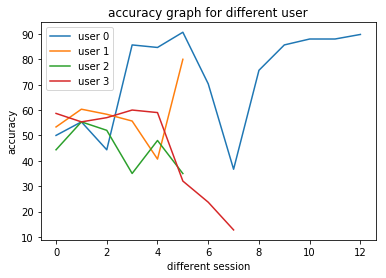

In [84]:
# l = ['(a)', '(b)', '(c)']
ll = [user1, user2, user3, user4]
for i in range(4):
    pyplot.plot( ll[i], label='user '+str(i))  

    pyplot.xlabel('different session')
    pyplot.ylabel('accuracy')
    pyplot.title('accuracy graph for different user')
    pyplot.legend(loc='upper left')
pyplot.show()

In [85]:
# xa = 0
# xb = 0
# ya = 2
# yb = 2
# import math
# dist = math.sqrt((ya-xa)*(ya-xa)+(yb-xb)*(yb-xb))
# print(dist)